## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nhanes_loader
import importlib
importlib.reload(nhanes_loader)
import numpy as np
import janitor
from sklearn.linear_model import LinearRegression

janitor allows command to find and replace

## Import Household Adult File

In [ ]:
from nhanes.household_adult_file import HouseholdAdultFile
nh = HouseholdAdultFile()

In [ ]:
nh.cols

## Import Exam File

In [ ]:
import nhanes.exam_file
importlib.reload(nhanes.exam_file)
from nhanes.exam_file import ExamFile

In [ ]:
exam = ExamFile()

In [ ]:
exam.data.shape

In [ ]:
exam.cols

## Import Household Youth File

In [ ]:
import nhanes.household_youth_file
importlib.reload(nhanes.household_youth_file)
from nhanes.household_youth_file import HouseholdYouthFile

In [ ]:
youth = HouseholdYouthFile()

In [ ]:
youth.cols

## Combine adult and exam files - adult_exam

match files on the SEQN field 

In [ ]:
adult_exam = nh.data.set_index('SEQN').join(exam.data.set_index('SEQN'),rsuffix='_exam')

In [ ]:
adult_exam.info()

## Combine youth and exam files - youth_exam

In [ ]:
youth_exam = youth.data.set_index('SEQN').join(exam.data.set_index('SEQN'),rsuffix='_exam')

In [ ]:
youth_exam.info()

In [ ]:
youth_exam.query('HSAGEIR < 18').shape

# Hankinson Exclusion

Ages - have none over 89; 17-89
20,050 patients in adult exam file (age > 0)

Any age  .shape - returns row and column count of a dataset

.describe() - returns statistics about numerical columns

.dtypes - returns the data type of each column

.count() - number of total values in column

.value_counts() - returns object counting counts of unique values

In [ ]:
adult_exam.query('HSAGEIR>0').shape

Any spirometry  H 16484 

20050 adult in exam file
16840  adult did spirometry

## SPPMANEU - # acceptable trials

According to the NHANES documentation, the values for SPPMANEU (number of acceptable trials)

00 150; 01-16 20836. 88 1445 blank 8880

so total spirometry is 150 + 20836 = 20986, but this doesn't match, looking at data base values which has 16840 with SPPMANEU 0 to <88

In [ ]:
adult_exam.SPPMANEU.value_counts()

adult_exam.SPPMANEU.value_counts()

In [ ]:
adult_exam.query('SPPMANEU != 88').shape

In [ ]:
adult_exam.query('SPPMANEU > -1 & SPPMANEU < 88').shape

## total with spirometry 16840
total 2 or more spirometry 16470

## number 2 or more acceptable trials  H 277, 16207  we have 16470 (+263)

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').shape

In [ ]:
adult_exam.query('SPPMANEU > 1 & SPPMANEU < 88').shape

### SPPREPRO = 4 both FVC and FEV1 reproducible; 1 FVC not reproducible; 2 FEV1 no reprod 3 neither FVC or FEV1 reproducible
What closely matches Hankinson is to take subjects with FEV1 reproducible or both FEV1 and FVC reproducible
15286 have 2 or more, both FEV1 and FVC reproducible
16289 have 2 or more, FEV1 reproducible - use that criteria (=4 | =1)

In [ ]:
adult_exam.SPPREPRO.value_counts()

In [ ]:
adult_exam.query('SPPMANEU > 1 & SPPMANEU < 88 & SPPREPRO == 4').shape

In [ ]:
adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)').shape

and age < 90 H 68,16139  we have 84  16386 (+26, +247)

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').shape

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('HSAGEIR < 90').shape)

## and age <90 16386, 16215

# first number is with 2 or more spirometries and = the parameter; 2nd is 2 or more with reproducible FEV1 with not the parameter

adult_exam.query('HSAGEIR >= 90').shape

and race/ethnicity not other  H 636, 15503

adult_exam.query('HSAGEIR > 0').shape

and race/ethnicity not other  H 636  15503  we have 639, 15747 (+3, +244)

In [ ]:
adult_exam.DMARETHN.value_counts()

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN == 4').shape

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').shape)

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').shape)

# and race not other 15747, 15580

and cigarette smoker H 7,667  7,836  We have  7787 7960 (+120  +124)


In [ ]:
adult_exam.HAR1.value_counts()

or statement not work, so need HAR1 = 2

In [ ]:
adult_exam.query('HAR1 == 1' or 'HAR1 == 8').shape

In [ ]:
adult_exam.query('HAR1 == 1 | HAR1 == 8').shape

In [ ]:
adult_exam.query('HAR1 == 2').shape

age<90 & ethnicity not other and not smoker(HAR1==2)

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 ==2').shape

# and not smoker('not HAR1==1') 7960, 7851

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1').shape

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1').shape)

HXPG1 how many cigarettes past 5 days. 0, #, or 888 applicable  SO '0 < HXPG1 < 888'
65 smoke cigarettes past 5 days

In [ ]:
adult_exam.query('0 < HXPG1 < 888').shape

include those not smoking cigarettes 5 days

In [ ]:
adult_exam.query('not (0 < HXPG1 < 888)').shape

In [ ]:
adult_exam.query('(HXPG1 ==0) | (HXPG1 == 888)').shape

HXPG2A -pipes

In [ ]:
adult_exam.query('0 < HXPG2A < 88').shape

HXPG2B - cigars

In [ ]:
adult_exam.query('0 < HXPG2B < 88').shape

adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 ==2').shape

cigs, pipe, cigars

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('MYPB11 ==1').shape

and cigar or pipe smoker  H 313, 7523  for cigar we have 284, 7676 

cigar HAR23  2 is not cigar

In [ ]:
adult_exam.HAR23.value_counts()

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 ==2').query('HAR23 == 2').shape

and pipe smoker with above H 313 7523  We have 326 7634 (+13 +111)

In [ ]:
adult_exam.HAR26.value_counts()

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').shape

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2')
 .query('HAR23 == 2').query('not HAR26 == 1').shape)

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' ).shape)

# and not cigar or pipe smoker 7634, 7531

and smoked cigarettes/cigar/pipes in 5 d prior to exam  H 408 7115  

SPQ4 cough, cold or other acute illness;  SPQ3 smoked, ate in past hour

In [ ]:
adult_exam.HAR1.value_counts()

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').query('SPPQ3 == 2').query('SPPQ4 == 2').query('SPPQ5 == 2').shape

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88')
 .query('HSAGEIR < 90').query('DMARETHN < 4')
 .query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').shape)

# add exclude if smoked in 5 days - only 2 more excluded 7632, 7529

In [ ]:
adult_exam.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88')
 .query('HSAGEIR < 90').query('DMARETHN < 4')
 .query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape)

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape)

In [ ]:
adult_exam.HAC1E.value_counts()

In [ ]:
adult_exam.HAR26.value_counts()

and asthma H  454  6661  query('HAC1E == 2') (which gives different that > 1

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('HAR26 == 2'). query('HAC1E == 2').shape)

# and asthma (7156 , 7060)

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2').shape)

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1').shape)

and chronic bronchitis H  181, 6480  HAC1F == 2

In [ ]:
adult_exam.HAC1F.value_counts()

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').shape)

# and chronic bronchitis (6960, 6868 subjects remaining)

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').shape)

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
. query('not HAC1F == 1').shape)

and emphysema  H 15, 6465  HAC1G == 2


In [ ]:
adult_exam.HAC1G.value_counts()

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').shape

# and emphysema (6943, 6852 remaining)

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2').shape)

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
  .query('not HAC1G == 1').shape)

## When add cancer excludes many, but Hankinson none (when lung cancer), so exclude this future analyses

In [ ]:
adult_exam.HAC1O.value_counts()

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAC1O == 2').shape

and wheezing 6 month  H 419 6046  HAL6

In [ ]:
adult_exam.HAL6.value_counts()

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').shape

and whistling or wheezing  H 112 5934  HAL10

In [ ]:
adult_exam.HAL6.value_counts()

# and wheezing 12 months 6493, 6408

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2')
 .query('HAL6 == 2').shape)

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1').shape)

# and wheezing 12 months not=1

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2')
 .query('not HAL6 == 1').shape)

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').shape

# and wheezing apart from colds 6366, 6285

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2')
 .query('HAL6 == 2')
 .query('HAL10 == 2').shape)

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .shape)

In [ ]:
adult_exam.HAL10.value_counts()

and persistent cough H 158, 5776  HAL1

# and not persistent cough 6200, 6121

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').shape

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .shape)

In [ ]:
adult_exam.HAL1.value_counts()

# and not persistent phlegm H 125  5776  HAL 3, 6065,5990

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').query('HAL3 == 2').shape

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .shape)

# and moderate shortness of breath H  848  4803  HAL5  5151 5116

In [ ]:
adult_exam.HAL3.value_counts()

In [ ]:
adult_exam.HAL5.value_counts()

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .shape)

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').query('HAL3 == 2').query('HAL5 == 2').shape

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1').query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1').query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1').query('HAL3 > 1').query('HAL5 == 2').shape

# and age < 81  H  139 4634  HSAGEIR 4944, 4925


adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1').query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1').query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1').query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81').shape

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88')
.query('HSAGEIR < 90').query('DMARETHN < 4')
.query('HAR1 == 2').query('HAR23 > 1')
.query('HAR26 > 1').query('HAC1E > 1')
.query('HAC1F > 1').query('HAC1G > 1')
.query('HAC1O > 1').query('HAL6 > 1')
.query('HAL1 > 1').query('HAL3 > 1')
.query('HAL5 == 2').query('HSAGEIR < 81').shape)

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .query('HSAGEIR < 81')
 .shape)

## Now create DataFrame adult_final of the final rows selected

set AdultFinal = adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1').query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1').query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1').query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81').shape

adult_final = (adult_exam.query('2 <= SPPMANEU < 88')
                         .query('HSAGEIR < 90').query('DMARETHN < 4')
                           .query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1')
                           .query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1')
                           .query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1')
                           .query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81'))

Not use this adult_final = (adult_exam.query('2 <= SPPMANEU < 88')
                         .query('HSAGEIR < 90').query('DMARETHN < 4')
                           .query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1')
                           .query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1')
                           .query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1')
                           .query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81'))

In [ ]:
adult_final = (adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1').query('not HAC1G == 1')
 .query('not HAL6 == 1').query('not HAL10 == 1')
 .query('not HAL1 == 1').query('not HAL3 == 1').query('not HAL5 == 1')
 .query('HSAGEIR < 81'))

In [ ]:
af = adult_final

In [ ]:
af.info()

In [ ]:
nh.cols[nh.cols.description.str.contains('age')]

In [ ]:
af.SPPFEV1

## Now do youth exclusion

In [ ]:
youth_exam.shape

13944 youth in exam file
4146  youth did spirometry

In [ ]:
youth_exam.query('(SPPMANEU > -1 & SPPMANEU < 88)').shape

age 8-17

In [ ]:
youth_exam.query('7 < HSAGEIR < 17').shape

In [ ]:
youth_exam.query('HSAGEIR > 0').shape

Youth ethnicity

In [ ]:
youth_exam.query('HSAGEIR > 0').shape

In [ ]:
youth_exam.DMARETHN.value_counts()

spirometry unusable <2 curves

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.shape)

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').shape

ethnicity other

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.shape)

In [ ]:
youth_exam.MYPB1.value_counts()

MYPB1 smoked at least one cigarette - too many so not use
MYPB11 cigarettes smoked in the past 5 days
MYPB3 smoked 100+cigarettes in life
MYPB27A pipes past 5 days
MYPB27B cigars past 5 days

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB1 == 1').shape

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.shape)

smoked 5 days B11 and B27

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').shape

and B27

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.shape)

asthma E1g

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.shape)

chronic bronchitis E1h

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.shape)

wheezing 12 months

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.shape)

wheezing apart from colds

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.shape)

Youth 12 years and older with above H 1298

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('HSAGEIR > 11').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('HSAGEIR > 11')
.shape)

and not persistent cough G2 H 2816 **I all age

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.shape)

and not persistent phlegm G4 H 2806

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.shape)

and Youth age 8-under 12

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').query('HSAGEIR < 12').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('HSAGEIR < 12')
.shape)

and not persistent cough G6 and G7

In [ ]:
youth_exam.HYG7.value_counts()

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').query('not HYG7 == 555').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('not HYG7 == 555')
.shape)

## Create youth_final

youth_final = (youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88')
               .query('DMARETHN < 4').query('not MYPB3 == 1')
               .query('not MYPB11 >0').query('not MYPB27A >0')
               .query('not HYE1G == 1').query('not HYE1H == 1')
               .query('not HYG8 == 1').query('not HYG12 == 1')
               .query('not HYG2 == 1').query('not HYG4 == 1')
               .query('not HYG7 == 555'))

not use anymore youth_final = (youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88')
               .query('DMARETHN < 4').query('not MYPB3 == 1')
               .query('not MYPB11 >0').query('not MYPB27A >0')
               .query('not HYE1G == 1').query('not HYE1H == 1')
               .query('not HYG8 == 1').query('not HYG12 == 1')
               .query('not HYG2 == 1').query('not HYG4 == 1')
               .query('not HYG7 == 555'))

In [ ]:
youth_final = (youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('not HYG7 == 555'))

In [286]:
youth_final.shape

(2780, 67)

In [ ]:
youth_final.head(2)

After all of the exclusions, the youth_final dataframe has 2812 entries.

In [ ]:
youth.cols

## Reviewing adult file

In [ ]:
cols = nh.cols
cols

In [ ]:
cols[cols.description.str.contains('(?:smok|cig)')]

In [ ]:
nh.hist_amount('HAR4S');

In [ ]:
nh.hist_amount('HSAITMOR',outliers=1200);

In [ ]:
nh.hist_amount('DMARETHN', outliers=25);

In [ ]:
cols[cols.description.str.contains('weight|pounds') & ~cols.description.str.contains('(sample|interview|weighting|exam)')]

In [ ]:
cols[cols.description.str.contains('stand') ]

Test Markdown

In [ ]:
nh.hist_amount('HAR4S');

In [ ]:
nh.hist_amount('HSAITMOR',outliers=1200);

## Now analyze adult_final

In [283]:
adult_final.head()

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPTIME,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,2,2,2,2,2,2,2,2,2,2,2,2,1,3,1,1,21,2,NaN,NaN,261,NaN,2.0,2.0,2.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,21.0,2.0,NaN,NaN,NaN,1008.0,5.0,10513.0,3576.0,4640.0,5650.0,5884.0,5988.0,4085.0,1230.0,1.0,4.0,09:25,11.0,22.0,1.0,1735.14,262.0,178.8,93.1,81.60,1,3.0,1.0,261.0,NaN,NaN,NaN,0.774883,0.788579,1.755678,1.786710,2.265733,0.943554,0.982632
4,2,2,2,2,2,2,2,2,2,2,2,2,1,3,1,2,32,2,NaN,NaN,384,NaN,2.0,2.0,2.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,32.0,2.0,NaN,NaN,NaN,1008.0,5.0,9205.0,2545.0,3089.0,3523.0,3535.0,3536.0,3722.0,1303.0,1.0,4.0,17:43,9.0,24.0,2.0,1725.01,384.0,162.2,86.1,61.65,1,3.0,1.0,384.0,NaN,NaN,NaN,0.873586,0.873833,2.603224,2.603960,2.979929,0.996324,0.999717
45,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,67,2,814.0,1.0,813,NaN,2.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,67.0,2.0,814.0,1.0,1.0,1605.0,3.0,4079.0,NaN,1840.0,NaN,NaN,2009.0,NaN,8888.0,3.0,4.0,88888,NaN,24.0,2.0,4582.03,NaN,163.4,NaN,68.00,2,2.0,3.0,813.0,0.0,0.0,88.0,0.915879,NaN,2.030363,NaN,2.216848,NaN,NaN
52,2,2,2,2,2,2,2,2,2,2,2,2,1,3,1,1,50,2,NaN,NaN,602,NaN,2.0,2.0,2.0,2.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,50.0,2.0,NaN,NaN,NaN,1012.0,5.0,11424.0,3781.0,4658.0,5104.0,5301.0,5514.0,5684.0,1868.0,1.0,4.0,09:24,13.0,21.0,1.0,1398.57,603.0,178.2,95.4,79.60,1,3.0,1.0,602.0,NaN,NaN,NaN,0.844759,0.878702,2.071817,2.155065,2.452555,0.925644,0.961371
60,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,19,2,NaN,NaN,235,NaN,2.0,2.0,2.0,2.0,2.0,8.0,NaN,NaN,NaN,NaN,NaN,19.0,2.0,NaN,NaN,NaN,1012.0,8.0,9183.0,2986.0,3651.0,3899.0,3981.0,4009.0,5075.0,2496.0,1.0,4.0,14:10,8.0,24.0,2.0,4368.57,236.0,175.3,89.3,74.20,2,2.0,3.0,235.0,NaN,NaN,NaN,0.910701,0.917106,2.290596,2.306707,2.515201,0.972562,0.993016


In [284]:
adult_final[adult_final.SPPFEV1==8888]

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPTIME,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
adult_final[adult_final.SPPFEV3==88888]
# this shows rows with 88888 in SPPFEV3 - 45, 2518, 3216, 5167 etc
# Then want replace with NaN

after running replace there are no longer FEV3 of 88888

In [ ]:
adult_final['SPPFEV3'].isnull().sum()

In [ ]:
adult_final[adult_final.SPPFEV3==88888]

In [288]:
adult_final.describe()

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC
count,4925.0,4925.0,4925.000000,4925.0,4925.0,4925.000000,4925.000000,4925.000000,4925.000000,4925.0,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.0,22.000000,22.000000,4925.000000,0.0,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,0.0,0.0,0.0,0.0,0.0,4925.000000,4925.0,22.000000,22.000000,22.000000,4925.000000,4925.000000,4925.000000,4903.000000,4925.000000,4903.000000,4903.000000,4925.000000,4903.000000,4925.000000,4925.000000,4925.000000,4920.000000,4925.000000,4925.000000,4925.000000,4903.000000,4925.000000,4903.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,22.0,22.0,22.000000,4925.000000,4903.000000,4925.000000,4903.000000,4925.000000,4903.000000,4903.000000
mean,2.0,2.0,2.003655,2.0,2.0,2.001218,1.983350,2.001421,2.002437,2.0,2.001218,2.011777,1.362437,2.029442,2.290558,1.623350,37.942132,2.0,738.772727,1.409091,462.658883,NaN,2.187614,2.186396,2.185787,2.044670,2.151878,5.574416,NaN,NaN,NaN,NaN,NaN,37.942132,2.0,738.772727,1.409091,1.227273,1223.226193,6.192284,7533.974619,2522.519070,3180.807107,3666.544972,3789.681827,3852.018274,3394.523353,1294.235736,1.009949,3.858680,9.416057,23.501320,1.623350,9663.760335,460.444218,165.668995,1336.465858,1516.607194,1.362437,2.029442,2.290558,462.658883,0.0,0.0,76.000000,0.826157,0.840895,1.977110,2.013731,2.393712,0.948757,0.981574
std,0.0,0.0,0.148054,0.0,0.0,0.085496,0.166579,0.099746,0.120898,0.0,0.085496,0.276083,0.529406,0.824179,0.956954,0.484595,17.488992,0.0,229.193188,0.503236,249.957743,NaN,1.044369,1.041082,1.041484,1.121767,1.063041,1.497085,NaN,NaN,NaN,NaN,NaN,17.488992,0.0,229.193188,0.503236,0.428932,744.797653,1.603136,2154.577564,664.226352,876.758994,1011.754523,1026.146823,1030.541945,1304.862837,886.619195,0.151162,0.635665,3.830451,2.187181,0.484595,12889.775756,208.902203,9.731032,10461.147390,35796.820825,0.529406,0.824179,0.956954,249.957743,0.0,0.0,30.910008,0.072924,0.061974,0.369588,0.369425,0.401715,0.044311,0.024514
min,2.0,2.0,2.000000,2.0,2.0,2.000000,1.000000,2.000000,2.000000,2.0,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,17.000000,2.0,252.000000,1.000000,204.000000,NaN,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,17.000000,2.0,252.000000,1.000000,1.000000,1001.000000,2.000000,668.000000,342.000000,675.000000,925.000000,925.000000,926.000000,243.000000,50.000000,1.000000,1.000000,1.000000,14.000000,1.000000,225.930000,204.000000,131.700000,69.700000,32.000000,1.000000,1.000000,1.000000,204.000000,0.0,0.0,0.000000,0.430769,0.442043,0.437173,0.437459,0.989630,0.689231,0.794219
25%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.0,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,24.000000,2.0,659.500000,1.000000,289.000000,NaN,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,NaN,NaN,NaN,NaN,NaN,24.000000,2.0,659.500000,1.000000,1.000000,1010.000000,5.000000,6077.000000,2083.000000,2581.000000,2967.500000,3078.000000,3145.000000,2488.500000,702.000000,1.000000,4.000000,7.000000,23.000000,1.000000,2124.810000,289.000000,158.500000,83.400000,60.700000,1.000000,1.000000,1.000000,289.000000,0.0,0.0,88.000000,0.782431,0.803013,1.729972,1.762524,2.125053,0.924781,0.972787
50%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.0,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,33.000000,2.0,834.000000,1.000

In [ ]:
m20overb[m20overb.MMEFPP > 20]

In [ ]:
adult_final.HSAITMOR.hist(bins='auto', range=(0,1200))

# change bad/blank data to NaN in adult_final then youth_final

from NHANES doc, SPPPEAK 1596 with 8888
  SPPFEV05 1832 with 8888
  SPPFEV1 1596 with 8888
  SPPFEV3 1832 with 88888
  SPPFEV6 1832 with 88888
  SPPFVC 1596 with 88888
  SPPMMEF 1832 with 88888
  SPPEXPIR 1638 with 88
  SPPFEF75 1832 with 8888
  
  mapping = {8888: np.nan)
  
  adult_final.update_where( 
      (adult_final['SPPFEV3'] == 88888), 'SPPFEV3',np.nan)
  )
  


In [172]:

(adult_final.update_where( (adult_final['SPPFEV3'] == 88888), 'SPPFEV3',np.nan)
.update_where( (adult_final['SPPFEV6'] == 88888), 'SPPFEV6',np.nan)
.update_where( (adult_final['SPPFVC'] == 88888), 'SPPFVC',np.nan)
.update_where( (adult_final['SPPMMEF'] == 88888), 'SPPMMEF',np.nan)
.update_where( (adult_final['SPPEXPIR'] == 88), 'SPPEXPIR',np.nan)
.update_where( (adult_final['SPPFEF75'] == 8888), 'SPPFEV3',np.nan)
.update_where( (adult_final['SPPFEV05'] == 8888), 'SPPFEV05',np.nan)
.update_where( (adult_final['SPPFEV1'] == 8888), 'SPPFEV1',np.nan)
) 

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
SEQN,,,,,,,,,,,,,,,,,,,,,
3,2,2,2,2,2,2,2,2,2,2,...,178.8,93.1,81.60,1,3.0,1.0,261.0,NaN,NaN,NaN
4,2,2,2,2,2,2,2,2,2,2,...,162.2,86.1,61.65,1,3.0,1.0,384.0,NaN,NaN,NaN
45,2,2,2,2,2,2,2,2,2,2,...,163.4,NaN,68.00,2,2.0,3.0,813.0,0.0,0.0,88.0
52,2,2,2,2,2,2,2,2,2,2,...,178.2,95.4,79.60,1,3.0,1.0,602.0,NaN,NaN,NaN
60,2,2,2,2,2,2,2,2,2,2,...,175.3,89.3,74.20,2,2.0,3.0,235.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53558,2,2,2,2,2,2,2,2,2,2,...,163.1,83.3,64.10,1,1.0,3.0,663.0,NaN,NaN,NaN
53567,2,2,2,2,2,2,2,2,2,2,...,158.7,84.4,74.55,1,3.0,1.0,432.0,NaN,NaN,NaN
53592,2,2,2,2,2,2,2,2,2,2,...,166.8,85.5,53.20,1,3.0,1.0,235.0,NaN,NaN,NaN


In [ ]:
(youth_final.update_where( (youth_final['SPPFEV3'] == 88888), 'SPPFEV3',np.nan)
.update_where( (youth_final['SPPFEV6'] == 88888), 'SPPFEV6',np.nan)
.update_where( (youth_final['SPPFVC'] == 88888), 'SPPFVC',np.nan)
.update_where( (youth_final['SPPMMEF'] == 88888), 'SPPMMEF',np.nan)
.update_where( (youth_final['SPPEXPIR'] == 88), 'SPPEXPIR',np.nan)
.update_where( (youth_final['SPPFEF75'] == 8888), 'SPPFEV3',np.nan)
.update_where( (youth_final['SPPFEV05'] == 8888), 'SPPFEV05',np.nan)
.update_where( (youth_final['SPPFEV1'] == 8888), 'SPPFEV1',np.nan)
) 

Determine how many NaN there are for each parameter;
There are 22 missing values in adult_final

In [293]:

print ("youth rows cols ", youth_final.shape)
print ("Youth FEV3 ", youth_final['SPPFEV3'].isnull().sum(), 
       " FEV6 ", youth_final['SPPFEV6'].isnull().sum(),
       " FVC ", youth_final['SPPFVC'].isnull().sum(),
       " MMEF ", youth_final['SPPMMEF'].isnull().sum(),
       " EXPIR ", youth_final['SPPEXPIR'].isnull().sum(),
       " FEF75 ", youth_final['SPPFEF75'].isnull().sum(),
       " FEV05 ", youth_final['SPPFEV05'].isnull().sum(),
       " FEV1 ", youth_final['Sprint ("adult rows cols ",adult_final.shape)
print ("Adult FEV3 ", adult_final['SPPFEV3'].isnull().sum(), 
       " FEV6 ", adult_final['SPPFEV6'].isnull().sum(),
       " FVC ", adult_final['SPPFVC'].isnull().sum(),
       " MMEF ", adult_final['SPPMMEF'].isnull().sum(),
       " EXPIR ", adult_final['SPPEXPIR'].isnull().sum(),
       " FEF75 ", adult_final['SPPFEF75'].isnull().sum(),
       " FEV05 ", adult_final['SPPFEV05'].isnull().sum(),
       " FEV1 ", adult_final['SPPFEV1'].isnull().sum()
      )PPFEV1'].isnull().sum()
      )

adult rows cols  (4925, 73)
Adult FEV3  22  FEV6  22  FVC  0  MMEF  22  EXPIR  5  FEF75  0  FEV05  22  FEV1  0
youth rows cols  (2780, 67)
Youth FEV3  0  FEV6  0  FVC  0  MMEF  0  EXPIR  0  FEF75  0  FEV05  0  FEV1  0


prior to deleting null rows 
adult rows cols  (4925, 73)
Adult FEV3  22  FEV6  22  FVC  0  MMEF  22  EXPIR  5  FEF75  0  FEV05  22  FEV1  0
youth rows cols  (2780, 67)
Youth FEV3  0  FEV6  0  FVC  0  MMEF  0  EXPIR  0  FEF75  0  FEV05  0  FEV1  0

Now remove the adult rows which have null values in FEV3 and see if that clears all the rest of NaN
When do that says is 4903, which is 22 less, but when print adult_final back to 4925

In [296]:
adult_final = adult_final.dropna(subset=['SPPFEV3'])

In [297]:
print ("adult rows cols ",adult_final.shape)
print ("Adult FEV3 ", adult_final['SPPFEV3'].isnull().sum(), 
       " FEV6 ", adult_final['SPPFEV6'].isnull().sum(),
       " FVC ", adult_final['SPPFVC'].isnull().sum(),
       " MMEF ", adult_final['SPPMMEF'].isnull().sum(),
       " EXPIR ", adult_final['SPPEXPIR'].isnull().sum(),
       " FEF75 ", adult_final['SPPFEF75'].isnull().sum(),
       " FEV05 ", adult_final['SPPFEV05'].isnull().sum(),
       " FEV1 ", adult_final['SPPFEV1'].isnull().sum()
      )

adult rows cols  (4903, 73)
Adult FEV3  0  FEV6  0  FVC  0  MMEF  0  EXPIR  0  FEF75  0  FEV05  0  FEV1  0


In [289]:
youth_final.shape

(2780, 67)

Now change blank data (8888 or 88888) to NaN
for variables 
Example below creates new df wind2 from wind
mapping = {-9999.0: np.nan}
wind2 = (
    wind
    .find_replace(
        usgs_pr_id=mapping,
        p_tnum=mapping,
        p_cap=mapping,
        t_cap=mapping,
        t_hh=mapping,
        t_rd=mapping,
        t_rsa=mapping,
        t_ttlh=mapping,
    )
)
wind2.head()

Example below replaces data with nan
(
    wind.update_where(
        (wind['p_year'] < 1887) | (wind['p_year'] > 2018), 'p_year', np.nan
    )
    .update_where((wind['t_hh'] <= 0) | (wind['t_hh'] >= 1000), 't_hh', np.nan)
    .update_where((wind['xlong'] < -161.76) | (wind['xlong'] > -68.01), 'xlong', np.nan)
);
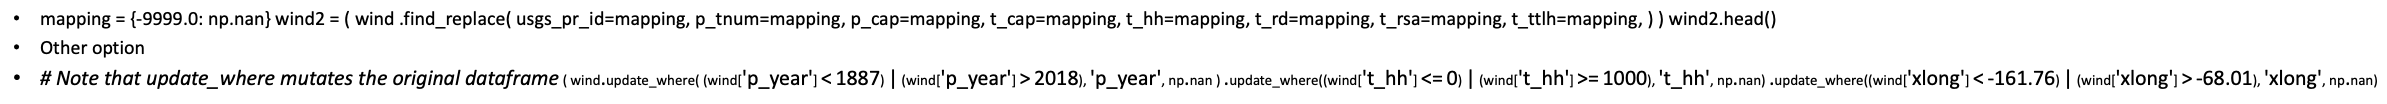

## Create new fields in adult_final and youth_final

Create new fields (XoY = X/Y) in youth_final and adult_final

In [175]:
oldvariables = [ 'SPPFEV1', 'SPPFEV3', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF', 'SPPFEF75', 'SPPEXPIR']

## Create new variables in adult_final final and youth_final

newvariables = ['FEV1OFVC', 'FEV1OFEV6', 'PEFROFVC', 'PEFROFEV6', 'PEFROFEV1', 'FEV3OFVC', 'FEV6OFVC']

def createvariables(df):
    df['FEV1OFVC'] = df.SPPFEV1 / df.SPPFVC
    df['FEV1OFEV6']= df.SPPFEV1 / df.SPPFEV6
    df['PEFROFVC'] = df.SPPPEAK / df.SPPFVC
    df['PEFROFEV6']= df.SPPPEAK / df.SPPFEV6
    df['PEFROFEV1'] = df.SPPPEAK / df.SPPFEV1
    df['FEV3OFVC'] = df.SPPFEV3 / df.SPPFVC
    df['FEV6OFVC'] = df.SPPFEV6 / df.SPPFVC
    return

In [176]:
def createvariables(df):
    df['FEV1OFVC'] = df.SPPFEV1 / df.SPPFVC
    df['FEV1OFEV6']= df.SPPFEV1 / df.SPPFEV6
    df['PEFROFVC'] = df.SPPPEAK / df.SPPFVC
    df['PEFROFEV6']= df.SPPPEAK / df.SPPFEV6
    df['PEFROFEV1'] = df.SPPPEAK / df.SPPFEV1
    df['FEV3OFVC'] = df.SPPFEV3 / df.SPPFVC
    df['FEV6OFVC'] = df.SPPFEV6 / df.SPPFVC
    return
    

createvariables(adult_final) then youth_final

In [177]:
createvariables(adult_final)

In [178]:
createvariables(youth_final)

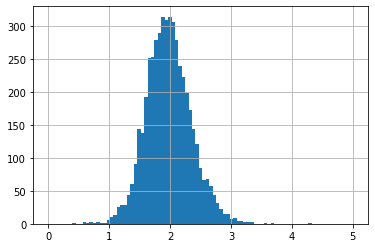

In [179]:
adult_final.PEFROFVC.hist(bins='auto', range=(0,5))

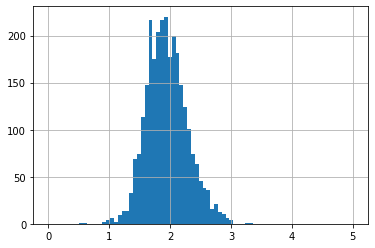

In [180]:
youth_final.PEFROFVC.hist(bins='auto', range=(0,5))

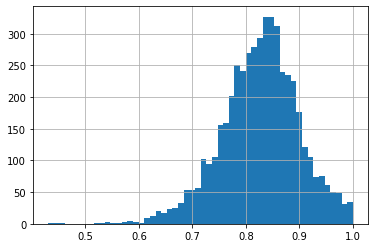

In [181]:
adult_final.FEV1OFVC.hist(bins='auto')

In [182]:
adult_final.describe()

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC
count,4925.0,4925.0,4925.000000,4925.0,4925.0,4925.000000,4925.000000,4925.000000,4925.000000,4925.0,...,22.0,22.0,22.000000,4925.000000,4903.000000,4925.000000,4903.000000,4925.000000,4903.000000,4903.000000
mean,2.0,2.0,2.003655,2.0,2.0,2.001218,1.983350,2.001421,2.002437,2.0,...,0.0,0.0,76.000000,0.826157,0.840895,1.977110,2.013731,2.393712,0.948757,0.981574
std,0.0,0.0,0.148054,0.0,0.0,0.085496,0.166579,0.099746,0.120898,0.0,...,0.0,0.0,30.910008,0.072924,0.061974,0.369588,0.369425,0.401715,0.044311,0.024514
min,2.0,2.0,2.000000,2.0,2.0,2.000000,1.000000,2.000000,2.000000,2.0,...,0.0,0.0,0.000000,0.430769,0.442043,0.437173,0.437459,0.989630,0.689231,0.794219
25%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.0,...,0.0,0.0,88.000000,0.782431,0.803013,1.729972,1.762524,2.125053,0.924781,0.972787
50%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.0,...,0.0,0.0,88.000000,0.830703,0.842409,1.961848,1.999001,2.373698,0.957393,0.991474
75%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.0,...,0.0,0.0,88.000000,0.873748,0.879642,2.208861,2.247421,2.646116,0.984312,0.999437
max,2.0,2.0,8.000000,2.0,2.0,8.000000,9.000000,9.000000,8.000000,2.0,...,0.0,0.0,88.000000,1.000000,1.000422,4.283804,3.588963,4.287374,1.000000,1.000000


In [183]:
adult_final.BMPHT.std()

9.731032035139023

In [184]:
adult_final.describe()

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC
count,4925.0,4925.0,4925.000000,4925.0,4925.0,4925.000000,4925.000000,4925.000000,4925.000000,4925.0,...,22.0,22.0,22.000000,4925.000000,4903.000000,4925.000000,4903.000000,4925.000000,4903.000000,4903.000000
mean,2.0,2.0,2.003655,2.0,2.0,2.001218,1.983350,2.001421,2.002437,2.0,...,0.0,0.0,76.000000,0.826157,0.840895,1.977110,2.013731,2.393712,0.948757,0.981574
std,0.0,0.0,0.148054,0.0,0.0,0.085496,0.166579,0.099746,0.120898,0.0,...,0.0,0.0,30.910008,0.072924,0.061974,0.369588,0.369425,0.401715,0.044311,0.024514
min,2.0,2.0,2.000000,2.0,2.0,2.000000,1.000000,2.000000,2.000000,2.0,...,0.0,0.0,0.000000,0.430769,0.442043,0.437173,0.437459,0.989630,0.689231,0.794219
25%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.0,...,0.0,0.0,88.000000,0.782431,0.803013,1.729972,1.762524,2.125053,0.924781,0.972787
50%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.0,...,0.0,0.0,88.000000,0.830703,0.842409,1.961848,1.999001,2.373698,0.957393,0.991474
75%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.0,...,0.0,0.0,88.000000,0.873748,0.879642,2.208861,2.247421,2.646116,0.984312,0.999437
max,2.0,2.0,8.000000,2.0,2.0,8.000000,9.000000,9.000000,8.000000,2.0,...,0.0,0.0,88.000000,1.000000,1.000422,4.283804,3.588963,4.287374,1.000000,1.000000


In [185]:
print (adult_final.columns.values)

['HAR1' 'HAR23' 'HAR26' 'HAC1E' 'HAC1F' 'HAC1G' 'HAC1O' 'HAL6' 'HAL10'
 'HAL1' 'HAL3' 'HAL5' 'DMARACER' 'DMARETHN' 'DMAETHNR' 'HSSEX' 'HSAGEIR'
 'HSAGEU' 'HXPAXTMR' 'HXPSESSR' 'HSAITMOR' 'HAR4S' 'SPPQ1' 'SPPQ2' 'SPPQ3'
 'SPPQ4' 'SPPQ5' 'SPPMANEU' 'MYPB1' 'MYPB3' 'MYPB11' 'MYPB27A' 'MYPB27B'
 'HSAGEIR_exam' 'HSAGEU_exam' 'HXPAXTMR_exam' 'HXPSESSR_exam' 'HXPEJ6A2'
 'SPPTECH1' 'SPPTRIAL' 'SPPPEAK' 'SPPFEV05' 'SPPFEV1' 'SPPFEV3' 'SPPFEV6'
 'SPPFVC' 'SPPMMEF' 'SPPFEF75' 'SPPTYPE' 'SPPREPRO' 'SPPTIME' 'SPPEXPIR'
 'SPPTEMP' 'HSSEX_exam' 'WTPFHX6' 'MXPAXTMR' 'BMPHT' 'BMPSITHT' 'BMPWT'
 'DMARACER_exam' 'DMARETHN_exam' 'DMAETHNR_exam' 'HSAITMOR_exam' 'HXPG1'
 'HXPG2A' 'HXPG2B' 'FEV1OFVC' 'FEV1OFEV6' 'PEFROFVC' 'PEFROFEV6'
 'PEFROFEV1' 'FEV3OFVC' 'FEV6OFVC']


In [186]:
print (youth_final.columns.values)

['HYE1G' 'HYE1H' 'HSSEX' 'HSAGEIR' 'HSAGEU' 'DMARACER' 'DMARETHN'
 'DMAETHNR' 'HXPAXTMR' 'HXPSESSR' 'HYG2' 'HYG4' 'HYG7' 'HYG8' 'HYG12'
 'HSAITMOR' 'SPPQ1' 'SPPQ2' 'SPPQ3' 'SPPQ4' 'SPPQ5' 'SPPMANEU' 'MYPB1'
 'MYPB3' 'MYPB11' 'MYPB27A' 'MYPB27B' 'HSAGEIR_exam' 'HSAGEU_exam'
 'HXPAXTMR_exam' 'HXPSESSR_exam' 'HXPEJ6A2' 'SPPTECH1' 'SPPTRIAL'
 'SPPPEAK' 'SPPFEV05' 'SPPFEV1' 'SPPFEV3' 'SPPFEV6' 'SPPFVC' 'SPPMMEF'
 'SPPFEF75' 'SPPTYPE' 'SPPREPRO' 'SPPTIME' 'SPPEXPIR' 'SPPTEMP'
 'HSSEX_exam' 'WTPFHX6' 'MXPAXTMR' 'BMPHT' 'BMPSITHT' 'BMPWT'
 'DMARACER_exam' 'DMARETHN_exam' 'DMAETHNR_exam' 'HSAITMOR_exam' 'HXPG1'
 'HXPG2A' 'HXPG2B' 'FEV1OFVC' 'FEV1OFEV6' 'PEFROFVC' 'PEFROFEV6'
 'PEFROFEV1' 'FEV3OFVC' 'FEV6OFVC']


In [187]:
youth_final.describe()

,HYE1G,HYE1H,HSSEX,HSAGEIR,HSAGEU,DMARACER,DMARETHN,DMAETHNR,HXPAXTMR,HXPSESSR,...,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC
count,2780.0,2780.0,2780.000000,2780.000000,2780.0,2780.000000,2780.000000,2780.000000,0.0,0.0,...,0.0,0.0,0.0,2780.000000,2780.000000,2780.000000,2780.000000,2780.000000,2780.000000,2780.000000
mean,2.0,2.0,1.520144,11.548921,2.0,1.423022,2.097482,2.274820,NaN,NaN,...,NaN,NaN,NaN,0.879639,0.882194,1.946137,1.951788,2.207626,0.983934,0.996959
std,0.0,0.0,0.499684,2.485246,0.0,0.540723,0.786395,0.961669,NaN,NaN,...,NaN,NaN,NaN,0.059748,0.058176,0.335503,0.335074,0.318381,0.019405,0.007506
min,2.0,2.0,1.000000,8.000000,2.0,1.000000,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,0.316216,0.413063,0.516216,0.583065,1.172145,0.581757,0.765541
25%,2.0,2.0,1.000000,9.000000,2.0,1.000000,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,0.843086,0.846568,1.705831,1.712801,1.988659,0.975538,0.997777
50%,2.0,2.0,2.000000,11.000000,2.0,1.000000,2.000000,3.000000,NaN,NaN,...,NaN,NaN,NaN,0.883113,0.884615,1.925133,1.929309,2.194626,0.988779,0.999314
75%,2.0,2.0,2.000000,14.000000,2.0,2.000000,3.000000,3.000000,NaN,NaN,...,NaN,NaN,NaN,0.920203,0.921689,2.153150,2.161449,2.409219,0.999076,0.999576
max,2.0,2.0,2.000000,16.000000,2.0,3.000000,3.000000,3.000000,NaN,NaN,...,NaN,NaN,NaN,1.000000,1.001080,3.312586,3.314879,3.652091,1.000000,1.000000


# Created other data bases to analyze

# adult m20overb m20overcma f18overb f18overcma

male 20 over. female 18 over; and cma (Caucasian-Mexican American) or b (black)
NOT NEED m20over = adult_final.query('HSAGEIR >=20 & HSSEX == 1’)
NOT NEED f18over = adult_final.query('HSAGEIR >=18 & HSSEX == 2’)
m20overb  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 2'))
m20overcma  = adult_final.query(('HSAGEIR >=20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overcma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overb = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 2 '))
m20overc  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 1'))
m20overma  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 3'))
f18overc = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 1 '))
f18overma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 3 '))

DMARETHN – 1 non-Hispanic white, 2 non-hispanic black, 3 Mexican American, 4 other


In [188]:
m20overb  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 2'))
m20overcma  = adult_final.query(('HSAGEIR >=20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overcma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overb = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 2 '))
m20overc  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 1'))
m20overma  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 3'))
f18overc = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 1 '))
f18overma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 3 '))

In [189]:
f18overb.describe()

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC
count,939.0,939.0,939.000000,939.0,939.0,939.0,939.000000,939.0,939.000000,939.0,...,3.0,3.0,3.0,939.000000,936.000000,939.000000,936.000000,939.000000,936.000000,936.000000
mean,2.0,2.0,2.006390,2.0,2.0,2.0,1.978701,2.0,2.006390,2.0,...,0.0,0.0,88.0,0.839725,0.852584,2.125443,2.159206,2.530754,0.952611,0.983791
std,0.0,0.0,0.195803,0.0,0.0,0.0,0.144457,0.0,0.195803,0.0,...,0.0,0.0,0.0,0.071704,0.061500,0.395039,0.395348,0.422704,0.042791,0.023189
min,2.0,2.0,2.000000,2.0,2.0,2.0,1.000000,2.0,2.000000,2.0,...,0.0,0.0,88.0,0.539349,0.563698,0.814485,0.843137,1.252341,0.763021,0.831153
25%,2.0,2.0,2.000000,2.0,2.0,2.0,2.000000,2.0,2.000000,2.0,...,0.0,0.0,88.0,0.796169,0.816355,1.879737,1.908463,2.247369,0.929021,0.975468
50%,2.0,2.0,2.000000,2.0,2.0,2.0,2.000000,2.0,2.000000,2.0,...,0.0,0.0,88.0,0.843328,0.854513,2.122661,2.152876,2.510473,0.960758,0.994349
75%,2.0,2.0,2.000000,2.0,2.0,2.0,2.000000,2.0,2.000000,2.0,...,0.0,0.0,88.0,0.887516,0.891510,2.357952,2.393025,2.793436,0.987891,0.999414
max,2.0,2.0,8.000000,2.0,2.0,2.0,2.000000,2.0,8.000000,2.0,...,0.0,0.0,88.0,1.000000,1.000000,3.583281,3.588963,4.029915,1.000000,1.000000


## Make dataframes mlt20 and flt18 for b, c, ma and cma combining adult final and youth final

male<20,female<18
mlt20b = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 2'))])
mlt20cma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3)'))])
flt18b = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 2'))])
flt18cma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3)'))])
mlt20c = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 1'))])
mlt20ma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 3'))])
flt18c = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 1'))])
flt18ma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 3'))])

DMARETHN – 1 non-Hispanic white, 2 non-hispanic black, 3 Mexican American, 4 other

In [190]:
mlt20b = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 2'))])
mlt20cma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3)'))])
flt18b = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 2'))])
flt18cma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3)'))])
mlt20c = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 1'))])
mlt20ma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 3'))])
flt18c = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 1'))])
flt18ma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 3'))])

# Create data bases for all male/female cma, black for ratios

Groups for ratios
All male cma  mallcma = pd.concat([m20overcma, mlt20cma])
All male black  mallb = pd.concat([m20overb, mlt20b])
All female cma  fallcma = pd.concat([f18overcma, flt18cma])
All female black  fallb = pd.concat([f18overb, flt18b])
All male c  mallc = pd.concat([m20overc, mlt20c])
All male ma  mallma = pd.concat([m20overma, mlt20ma])
All female c  fallc = pd.concat([f18overc, flt18c])
All female ma  fallma = pd.concat([f18overma, flt18ma])

In [191]:
mallcma = pd.concat([m20overcma, mlt20cma])
mallb = pd.concat([m20overb, mlt20b])
fallcma = pd.concat([f18overcma, flt18cma])
fallb = pd.concat([f18overb, flt18b])
mallc = pd.concat([m20overc, mlt20c])
mallma = pd.concat([m20overma, mlt20ma])
fallc = pd.concat([f18overc, flt18c])
fallma = pd.concat([f18overma, flt18ma])

## Check variable created

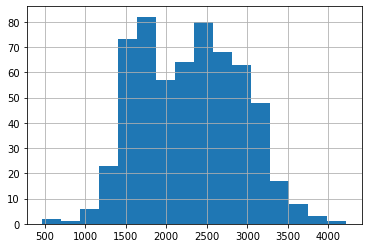

In [192]:
flt18b.SPPFEV1.hist(bins='auto')

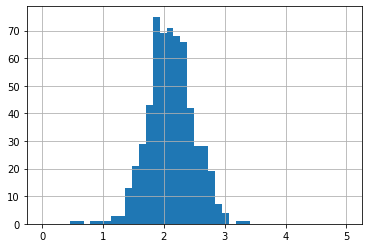

In [193]:
flt18b.PEFROFVC.hist(bins='auto', range=(0,5))

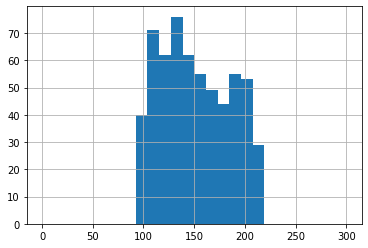

In [194]:
flt18b.HSAITMOR.hist(bins='auto', range=(0,300))

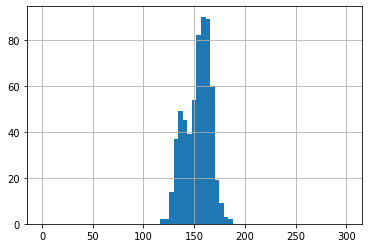

In [195]:
flt18b.BMPHT.hist(bins='auto', range=(0,300))

## Frames to Analyze

framestoanalyze = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, 
                   mlt20b, mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma, 
                   mallcma, mallb, mallc, mallma, fallcma, fallb, fallc, fallma]

In [196]:
framestoanalyze = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, 
                   mlt20b, mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma, 
                   mallcma, mallb, mallc, mallma, fallcma, fallb, fallc, fallma]

# framesto analyze names

m20overb.name = 'm20overb'
m20overcma.name = 'm20overcma'
f18overb.name = 'f18overb'
f18overcma.name = 'f18overcma'
mlt20b.name = 'mlt20b'
mlt20cma.name = 'mlt20cma'
flt18b.name = 'flt18b'
flt18cma.name = 'flt18cma'
mallcma.name = 'mallcma'
mallb.name = 'mallb'
fallcma.name = 'fallcma'
fallb.name = 'fallb'
m20overc.name = 'm20overc'
m20overma.name = 'm20ovecma'
f18overc.name = 'f18overc'
f18overma.name = 'f18overma'
mlt20c.name = 'mlt20c'
mlt20ma.name = 'mlt20ma'
flt18c.name = 'flt18c'
flt18ma.name = 'flt18ma'
mallma.name = 'mallma'
mallc.name = 'mallc'
fallma.name = 'fallma'
fallc.name = 'fallc'

In [197]:
m20overb.name = 'm20overb'
m20overcma.name = 'm20overcma'
f18overb.name = 'f18overb'
f18overcma.name = 'f18overcma'
mlt20b.name = 'mlt20b'
mlt20cma.name = 'mlt20cma'
flt18b.name = 'flt18b'
flt18cma.name = 'flt18cma'
mallcma.name = 'mallcma'
mallb.name = 'mallb'
fallcma.name = 'fallcma'
fallb.name = 'fallb'
m20overc.name = 'm20overc'
m20overma.name = 'm20overma'
f18overc.name = 'f18overc'
f18overma.name = 'f18overma'
mlt20c.name = 'mlt20c'
mlt20ma.name = 'mlt20ma'
flt18c.name = 'flt18c'
flt18ma.name = 'flt18ma'
mallma.name = 'mallma'
mallc.name = 'mallc'
fallma.name = 'fallma'
fallc.name = 'fallc'

## Variables non-ratio

varsnonratio = [ 'SPPFEV1', 'SPPFEV3', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF', 'SPPFEF75', 'SPPEXPIR']

In [198]:
varsnonratio = [ 'SPPFEV1', 'SPPFEV3', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF', 'SPPFEF75', 'SPPEXPIR']

In [199]:
print (varsnonratio[0])

SPPFEV1


## Variables ratio

varsratio = ['FEV1OFVC', 'FEV1OFEV6', 'PEFROFVC', 'PEFROFEV6', 'PEFROFEV1', 'FEV3OFVC', 'FEV6OFVC']

In [200]:
varsratio= ['FEV1OFVC', 'FEV1OFEV6', 'PEFROFVC', 'PEFROFEV6', 'PEFROFEV1', 'FEV3OFVC', 'FEV6OFVC']

## Now fit curves

using example in lmfit.github.io/lmfit-py/model.html

import matplotlib.pyplot as plt

In [201]:
import matplotlib.pyplot as plt

## from sklearn.linear_model import LinearRegression

In [202]:
from sklearn.linear_model import LinearRegression

# Linear Regression Age  linear_regage (data, y_var)

In [203]:
# age = 'HSAGEIR'/12 - or age in months/12
def linear_regage(data, y_var):
    X = data['HSAITMOR_exam']/12  # to convert to year do months at exam
    X = np.array(X).reshape(-1, 1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
 #   print(data.name, ", ",y_var, ", ",lr.intercept_, ", ", lr.coef_, ", ", lr.score(X, y), ", ", data.loc[:,y_var].std(), ", ", data.loc[:,y_var].count())
 # now returns values rather than print - intercept, slope, R2, std, count
    return lr.intercept_, lr.coef_, lr.score(X, y),  data.loc[:,y_var].std(), data.loc[:,y_var].count()

In [204]:
for x in varsratio:
    print (x)

FEV1OFVC
FEV1OFEV6
PEFROFVC
PEFROFEV6
PEFROFEV1
FEV3OFVC
FEV6OFVC


## For all frames, for all ratios to analyze, do regression vs age & save in resultsratioand index dfnvarn

print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation')
for y in framestoanalyze:
Save results in dataframe resultsratio

In [205]:
# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "slope", "r2", "std", "count"]
# print (column_names)
resultsratio = pd.DataFrame(columns = column_names)
resultsratio.name = 'resultsratio'
print (resultsratio)
print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dfnvarn, dataframe,  variable,        intercept,          slope,            R squared,         standard deviation,  count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsratio:
 #       print(y, " ", xx)
        reg = linear_regage (y,xx)
        intercept, slope, r2, std, count = reg
        slope, = slope
        dfnvarn = y.name + xx
        print (dfnvarn, ',', y.name, ',', xx, ',', intercept, ',', slope, ',', r2, ',', std, ',',count)
    #   now need save these in array of dataframe.variable, intercept slope
        var = y.name
    
#  Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count] 

        df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'slope':slope, 'r2':r2, 'std':std, 'count':count}                          
        resultsratio = resultsratio.append(df2, ignore_index=True)    
print ('at end')
resultsratio.set_index('dfnvarn', inplace=True)
print (resultsratio)
    
    

Empty DataFrame
Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count]
Index: []
Linear Regression of variables in form y = intercept + slope * age
dfnvarn, dataframe,  variable,        intercept,          slope,            R squared,         standard deviation,  count
m20overbFEV1OFVC , m20overb , FEV1OFVC , 0.8384926730812566 , -0.0003644199385894481 , 0.04056653728576409 , 0.07090583571752003 , 476


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# regression for non-ratios height_age_reg(data, y_var)

In [206]:
def height_age_reg(data, y_var):
# convert agemonths to years
    X_age = data['HSAITMOR_exam']/12
    X_age = np.array(X_age).reshape(-1, 1)
    X_age = np.hstack((X_age, X_age**2))
    X_height = data['BMPHT']**2
    X_height = np.array(X_height).reshape(-1, 1)
    X = np.concatenate((X_age, X_height), axis=1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
 #   print(data.name, ", ",y_var, ", ",lr.intercept_, ",", lr.coef_, ",", lr.score(X, y), ",",  data.loc[:,y_var].std(), ",",  data.loc[:,y_var].count())
    return data.name, y_var, lr.intercept_, lr.coef_, lr.score(X, y), data.loc[:,y_var].std(), data.loc[:,y_var].count()

In [207]:
for x in varsnonratio:
    print (x)

SPPFEV1
SPPFEV3
SPPFEV6
SPPFVC
SPPPEAK
SPPMMEF
SPPFEF75
SPPEXPIR


# Create Resultsnonratio with all of regression results for all dataframes all nonratio variables

In [208]:
# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "b1", "b2", "b3", "r2", "std", "count"]
# print (column_names)
resultsnonratio = pd.DataFrame(columns = column_names)
resultsnonratio.name = 'resultsnonratio'
print (resultsnonratio)
print ('Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
print ('dfnvarn, dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsnonratio:
  #       print(y, " ", xx)
         reg = height_age_reg(y,xx)
         dbname, var, intercept, coef, r2, std, count = reg
         b1, b2, b3, = coef 
                  
         dfnvarn = y.name + xx
         print (dfnvarn, ',', dbname, ',', var, ',',intercept, ',',b1, ',',b2, ',',b3, ',',r2, ',',std, ',',count)
         #  Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count]  
            
         df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          
         resultsnonratio = resultsnonratio.append(df2, ignore_index=True)
print ('at end')
resultsnonratio.set_index('dfnvarn', inplace=True)
print (resultsnonratio)            

Empty DataFrame
Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count]
Index: []
Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height
dfnvarn, dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count
m20overbSPPFEV1 , m20overb , SPPFEV1 , 834.1423936943565 , -28.091308801343292 , 0.032409272125667826 , 0.11976129519847196 , 0.4701153193977501 , 715.6058687439651 , 476


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## ****** Now percent predicted - create variables for ratios first

First function to create PPratiovars for a dataframe, then create for all dataframes

In [209]:
def createvarspp(df):
    vn = df.name + 'FEV1OFVC'
    df['FEV1OFVCPP'] = df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
 #   print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6PP']= df.FEV1OFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'PEFROFEV6'
    df['PEFROFEV6PP']= df.PEFROFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'PEFROFEV1'
    df['PEFROFEV1PP'] = df.PEFROFEV1 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'FEV3OFVC'
    df['FEV3OFVCPP'] = df.FEV3OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'FEV6OFVC'
    df['FEV6OFVCPP'] = df.FEV6OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))

For all dataframes, create ppvar values (shows caveat but works)

In [210]:
for y in framestoanalyze:
    createvarspp(y)

KeyError: 'm20overbFEV1OFVC'

In [211]:
print (m20overb.columns.values)

['HAR1' 'HAR23' 'HAR26' 'HAC1E' 'HAC1F' 'HAC1G' 'HAC1O' 'HAL6' 'HAL10'
 'HAL1' 'HAL3' 'HAL5' 'DMARACER' 'DMARETHN' 'DMAETHNR' 'HSSEX' 'HSAGEIR'
 'HSAGEU' 'HXPAXTMR' 'HXPSESSR' 'HSAITMOR' 'HAR4S' 'SPPQ1' 'SPPQ2' 'SPPQ3'
 'SPPQ4' 'SPPQ5' 'SPPMANEU' 'MYPB1' 'MYPB3' 'MYPB11' 'MYPB27A' 'MYPB27B'
 'HSAGEIR_exam' 'HSAGEU_exam' 'HXPAXTMR_exam' 'HXPSESSR_exam' 'HXPEJ6A2'
 'SPPTECH1' 'SPPTRIAL' 'SPPPEAK' 'SPPFEV05' 'SPPFEV1' 'SPPFEV3' 'SPPFEV6'
 'SPPFVC' 'SPPMMEF' 'SPPFEF75' 'SPPTYPE' 'SPPREPRO' 'SPPTIME' 'SPPEXPIR'
 'SPPTEMP' 'HSSEX_exam' 'WTPFHX6' 'MXPAXTMR' 'BMPHT' 'BMPSITHT' 'BMPWT'
 'DMARACER_exam' 'DMARETHN_exam' 'DMAETHNR_exam' 'HSAITMOR_exam' 'HXPG1'
 'HXPG2A' 'HXPG2B' 'FEV1OFVC' 'FEV1OFEV6' 'PEFROFVC' 'PEFROFEV6'
 'PEFROFEV1' 'FEV3OFVC' 'FEV6OFVC']


Check can refer to resultsratio value

In [212]:
print(resultsratio)

            dfnvarn    dfname       var  intercept     slope        r2  \
0  m20overbFEV1OFVC  m20overb  FEV1OFVC   0.838493 -0.000364  0.040567   

        std count  
0  0.070906   476  


In [213]:
vn = 'm20overbFEV1OFVC'
print(resultsratio.loc[vn, 'intercept'] )

KeyError: 'm20overbFEV1OFVC'

In [214]:
print(resultsnonratio)

           dfnvarn    dfname      var   intercept         b1        b2  \
0  m20overbSPPFEV1  m20overb  SPPFEV1  834.142394 -28.091309  0.032409   

         b3        r2         std count  
0  0.119761  0.470115  715.605869   476  


In [215]:
vn = 'm20overbSPPFEV1'
print(resultsnonratio.loc[vn, 'intercept'] )

KeyError: 'm20overbSPPFEV1'

# Now create PP Nonratio PP  FEV1PP, PEFRPP, FVCPP, FEV3PP, FEV6PP, MMEFPP, FEF75PP, EXPIRPP  from resultsnonratio

In [216]:

# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')

def createvarsnonratiopp(df):
    vn = df.name + 'SPPFEV1'
    df['FEV1PP'] = df.SPPFEV1 / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFVC'
    df['FVCPP'] =  df.SPPFVC /  (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPPEAK'
    df['PEFRPP'] = df.SPPPEAK / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEV3'
    df['FEV3PP'] = df.SPPFEV3 / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEV6'
    df['FEV6PP'] = df.SPPFEV6 / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPMMEF'
    df['MMEFPP'] = df.SPPMMEF / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEF75'
    df['FEF75PP'] = df.SPPFEF75 / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPEXPIR'
    df['EXPIRPP'] = df.SPPEXPIR / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )

In [217]:
resultsnonratio.describe()

,intercept,b1,b2,b3,r2,std
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,834.142394,-28.091309,0.032409,0.119761,0.470115,715.605869
std,NaN,NaN,NaN,NaN,NaN,NaN
min,834.142394,-28.091309,0.032409,0.119761,0.470115,715.605869
25%,834.142394,-28.091309,0.032409,0.119761,0.470115,715.605869
50%,834.142394,-28.091309,0.032409,0.119761,0.470115,715.605869
75%,834.142394,-28.091309,0.032409,0.119761,0.470115,715.605869
max,834.142394,-28.091309,0.032409,0.119761,0.470115,715.605869


For all dataframes create varsnonratiopp

In [218]:
for y in framestoanalyze:
    print(y.name)
    createvarsnonratiopp(y)

m20overb


KeyError: 'm20overbSPPFEV1'

In [219]:
m20overb.FEV1PP.hist(bins='auto')

AttributeError: 'DataFrame' object has no attribute 'FEV1PP'

In [220]:
m20overb.MMEFPP.hist(bins='auto')

AttributeError: 'DataFrame' object has no attribute 'MMEFPP'

In [221]:
m20overb.MMEFPP.describe()

AttributeError: 'DataFrame' object has no attribute 'MMEFPP'

In [222]:
pd.set_option('display.max_columns', 999)

In [223]:
m20overb[m20overb.MMEFPP > 20]

AttributeError: 'DataFrame' object has no attribute 'MMEFPP'

Has many values as 88888 for SPPTIME, and 8888.0 SPPFEF75 AND SPPFEV05, 88888.0 for SPPMMEF, SPPFEV3, SPPFEV05, SPPFEV6
  from NHANES doc, SPPPEAK 1596 with 8888
  SPPFEV05 1832 with 8888
  SPPFEV1 1596 with 8888
  SPPFEV3 1832 with 88888
  SPPFEV6 1832 with 88888
  SPPFVC 1596 with 88888
  SPPMMEF 1832 with 88888
  SPPEXPIR 1638 with 88
  so need replace those in adult and youth files

So when doing analysis need ignore values of 8888

In [224]:
m20overb[m20overb.MMEFPP > 20]

AttributeError: 'DataFrame' object has no attribute 'MMEFPP'

# Now create variables that depend on PP - PEFRPPOFVCPP, and PEFRPPOFEV1PP, 
then regression vs age in resultsppvars in form dfvartnam, bo, b1
then new value %pred
then 

create PEFRpp/FEV1pp and PEFRpp/FVCpp for all dataframes

In [225]:
def createvariablespp(df):
    df['PEFRPPOFEV1PP'] = df.PEFRPP / df.FEV1PP
    df['PEFRPPOFVCPP']= df.PEFRPP/ df.FVCPP
    return

In [226]:
for y in framestoanalyze:
    createvariablespp(y)

AttributeError: 'DataFrame' object has no attribute 'PEFRPP'

linear regression of PEFRpp/FEV1pp and PEFRpp/FVCpp vs age into resultsratiopp; for all dataframes

In [227]:
varsratiopp= ['PEFRPPOFEV1PP', 'PEFRPPOFVCPP']

# First initialize resultsratiopp dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "slope", "r2", "std", "count"]
# print (column_names)
resultsratiopp = pd.DataFrame(columns = column_names)
resultsratiopp.name = 'resultsratiopp'
print (resultsratiopp)
print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation,  count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsratiopp:
 #       print(y, " ", xx)
        reg = linear_regage (y,xx)
        intercept, slope, r2, std, count = reg
        slope, = slope
        dfnvarn = y.name + xx
        print (dfnvarn, ',', y.name, ',', xx, ',', intercept, ',', slope, ',', r2, ',', std, ',',count)
    #   now need save these in array of dataframe.variable, intercept slope
        var = y.name
    
#  Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count] 

        df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'slope':slope, 'r2':r2, 'std':std, 'count':count}                          
        resultsratiopp = resultsratiopp.append(df2, ignore_index=True)    
print ('at end')
resultsratiopp.set_index('dfnvarn', inplace=True)
print (resultsratiopp)
    
    

In [228]:
# First initialize resultsratiopp dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "slope", "r2", "std", "count"]
# print (column_names)
resultsratiopp = pd.DataFrame(columns = column_names)
resultsratiopp.name = 'resultsratiopp'
print (resultsratiopp)
print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation,  count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsratiopp:
 #       print(y, " ", xx)
        reg = linear_regage (y,xx)
        intercept, slope, r2, std, count = reg
        slope, = slope
        dfnvarn = y.name + xx
        print (dfnvarn, ',', y.name, ',', xx, ',', intercept, ',', slope, ',', r2, ',', std, ',',count)
    #   now need save these in array of dataframe.variable, intercept slope
        var = y.name
    
#  Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count] 

        df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'slope':slope, 'r2':r2, 'std':std, 'count':count}                          
        resultsratiopp = resultsratiopp.append(df2, ignore_index=True)    
print ('at end')
resultsratiopp.set_index('dfnvarn', inplace=True)
print (resultsratiopp)
    
    

Empty DataFrame
Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count]
Index: []
Linear Regression of variables in form y = intercept + slope * age
dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation,  count


KeyError: 'PEFRPPOFEV1PP'

In [229]:
for y in framestoanalyze:
    createvariablespp(y)

AttributeError: 'DataFrame' object has no attribute 'PEFRPP'

Createvarsppopp for PEFRPPOFVCPPPP and PEFRPPOFVCPPPP

In [230]:
def createvarsppopp(df):
    vn = df.name + 'PEFRPPOFVCPP'
    df['PEFRPPOFVCPPPP'] = df.PEFRPPOFVCPP / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
 #   print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'PEFRPPOFEV1PP'
    df['PEFRPPOFEV1PPPP'] = df.PEFRPPOFEV1PP / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))

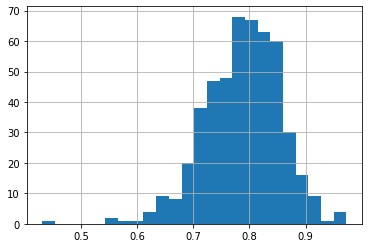

In [231]:
m20overc.FEV1OFVC.hist(bins='auto')

In [232]:
m20overc.FEV1OFVCPP.hist(bins='auto')

AttributeError: 'DataFrame' object has no attribute 'FEV1OFVCPP'

In [233]:
std = m20overc.FEV1OFVC.std()
mean = m20overc.FEV1OFVC.mean()
ratio = std / mean # m20overc.FEV1OFVC.std()/m20overc.FEV1OFVC.mean()
print (mean, ratio, ratio* 1.645, mean - (ratio*1.645))
print (.876 * mean)

0.7880228373416843 0.08683982510779856 0.14285151230232862 0.6451713250393557
0.6903080055113154


says mean FEV1/FVC .788, lower limit if use std for all data .645

The std is smaller for %predicted than for actual value
so to get 5% lower limit can use %predicted - 1.645 * std

In [234]:
std = m20overc.FEV1OFVCPP.std()
mean = m20overc.FEV1OFVCPP.mean()
ratio = std/mean # m20overc.FEV1OFVCPP.std()/m20overc.FEV1OFVCPP.mean()
print (mean, ratio, ratio*1.645, mean - (ratio*1.645))

AttributeError: 'DataFrame' object has no attribute 'FEV1OFVCPP'

says mean FEV1/FVC %pred is 100% and lower limit .876 of that
if use prior mean FEV1/FVC of .788, .876 of that is .69 which is higher than .645

Try saving variables to array

In [235]:
print (m20overc.name)
print (varsratio[1])
dfvar = m20overc.name + varsratio[1]
print (dfvar)

m20overc
FEV1OFEV6
m20overcFEV1OFEV6


In [236]:
print (resultsratio)

            dfnvarn    dfname       var  intercept     slope        r2  \
0  m20overbFEV1OFVC  m20overb  FEV1OFVC   0.838493 -0.000364  0.040567   

        std count  
0  0.070906   476  


new variable %pred ratios

data.loc['m20overbFEV1OFVC']

In [237]:
def height_age_reg(data, y_var):
# convert agemonths to years
    X_age = data['HSAGEIR']/12
    X_age = np.array(X_age).reshape(-1, 1)
    X_age = np.hstack((X_age, X_age**2))
    X_height = data['BMPHT']**2
    X_height = np.array(X_height).reshape(-1, 1)
    X = np.concatenate((X_age, X_height), axis=1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
    print(data.name, ", ",y_var, ", ",lr.intercept_, ",", lr.coef_, ",", lr.score(X, y), ",",  data.loc[:,y_var].std(), ",",  data.loc[:,y_var].count())
    return data.name, y_var, lr.intercept_, lr.coef_, lr.score(X, y), data.loc[:,y_var].std(), data.loc[:,y_var].count()

In [238]:
height_age_reg(m20overb, 'SPPFEV1')

m20overb ,  SPPFEV1 ,  786.1354240600908 , [-2.89942909e+02 -1.60937192e+00  1.18534679e-01] , 0.46996609416906876 , 715.6058687439651 , 476


('m20overb',
 'SPPFEV1',
 786.1354240600908,
 array([-2.89942909e+02, -1.60937192e+00,  1.18534679e-01]),
 0.46996609416906876,
 715.6058687439651,
 476)

# Regression for all dataframes all nonratio variables & save resultsnonratio

In [239]:
# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "b1", "b2", "b3", "r2", "std", "count"]
# print (column_names)
resultsnonratio = pd.DataFrame(columns = column_names)
resultsnonratio.name = 'resultsnonratio'
print (resultsnonratio)
print ('Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
print ('dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsnonratio:
 #       print(y, " ", xx)
         reg = height_age_reg(y,xx)
         dbname, var, intercept, coef, r2, std, count = reg
         b1, b2, b3, = coef
         print (dbname, ', ', var, ', ',intercept, ', ',b1, ', ',b2, ', ',b3, ', ',r2, ', ',std, ', ',count)
         #  Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count] 

         dfnvarn = y.name + xx   
            
         df2 = {'dfnvarn': [dfnvarn], 'dfname': y.name, 'var': xx, 'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          
         resultsnonratio = resultsnonratio.append(df2, ignore_index=True)

Empty DataFrame
Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count]
Index: []
Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height
dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count
m20overb ,  SPPFEV1 ,  786.1354240600908 , [-2.89942909e+02 -1.60937192e+00  1.18534679e-01] , 0.46996609416906876 , 715.6058687439651 , 476
m20overb ,  SPPFEV1 ,  786.1354240600908 ,  -289.94290908497453 ,  -1.6093719150337211 ,  0.11853467887661773 ,  0.46996609416906876 ,  715.6058687439651 ,  476


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Create percent predicted variables xxPP

def createvarspp(df):
    vn = df.name + 'FEV1OFVC'
  #  print (vn)
    resultsratio.loc[['m20overbFEV1OFVC'], ['intercept']] 
  #  print (resultsratio.loc['m20overbFEV1OFVC', 'intercept'])
  #  print (resultsratio.loc[vn, 'slope'])
    a =  resultsratio.loc['m20overbFEV1OFVC', 'intercept'] 
    b = resultsratio.loc[vn, 'slope']
  #  print (a)
  #  print ('b ', b)
    df['FEV1OFVCPP'] = df.FEV1OFVC / (a + b * (df.HSAGEIR / 12))
  #  df['FEV1OFVCPP'] = df. FEV1OFVC / (resultsratio.loc [vn,intercept] + resultsratio.loc[vn,slope]) # * df.HSAGEIR/12)
  #  df['FEV1OFVCPP'] = df.FEV1OFVC / 100
  def createvarspp(df):
    vn = df.name + 'FEV1OFVC'
  #  print (vn)
  #  resultsratio.loc[['m20overbFEV1OFVC'], ['intercept']] 
  #  print (resultsratio.loc['m20overbFEV1OFVC', 'intercept'])
  #  print (resultsratio.loc[vn, 'slope'])
  #  a =  resultsratio.loc['m20overbFEV1OFVC', 'intercept'] 
   # b = resultsratio.loc[vn, 'slope']
  #  print (a)
  #  print ('b ', b)
 #   df['FEV1OFVCPP'] = df.FEV1OFVC / (a + b * (df.HSAGEIR / 12))
    df['FEV1OFVCPP'] = df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))


def createvarspp(df):
    vn = df.name + 'FEV1OFVC'
    df['FEV1OFVCPP'] = df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
 #   print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6PP']= df.FEV1OFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFEV6'
    df['PEFROFEV6PP']= df.PEFROFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFEV1'
    df['PEFROFEV1PP'] = df.PEFROFEV1 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV3OFVC'
    df['FEV3OFVCPP'] = df.FEV3OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV6OFVC'
    df['FEV6OFVCPP'] = df.FEV6OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))

In [240]:
def createvarspp(df):
    vn = df.name + 'FEV1OFVC'
    df['FEV1OFVCPP'] = df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
#    print (vn)
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6PP']= df.FEV1OFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFEV6'
    df['PEFROFEV6PP']= df.PEFROFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFEV1'
    df['PEFROFEV1PP'] = df.PEFROFEV1 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV3OFVC'
    df['FEV3OFVCPP'] = df.FEV3OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV6OFVC'
    df['FEV6OFVCPP'] = df.FEV6OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))

In [241]:
print (m20overb)

       HAR1  HAR23  HAR26  HAC1E  HAC1F  HAC1G  HAC1O  HAL6  HAL10  HAL1  \
SEQN                                                                       
215       2      2      2      2      2      2      2     2      2     2   
460       2      2      2      2      2      2      2     2      2     2   
576       2      2      2      2      2      2      2     2      2     2   
580       2      2      2      2      2      2      2     2      2     2   
876       2      2      2      2      2      2      2     2      2     2   
...     ...    ...    ...    ...    ...    ...    ...   ...    ...   ...   
53347     2      2      2      2      2      2      2     2      2     2   
53371     2      2      2      2      2      2      2     2      2     2   
53446     2      2      2      2      2      2      2     2      2     2   
53490     2      2      2      2      2      2      2     2      2     2   
53495     2      2      2      2      2      2      2     2      2     2   

       HAL3

## now need do the same using Hankinson equations
Hvarlistnonratio - FEV1, FVC, FEV6, MMEF, PEF
Hvarlistratio - FEV1OFEV6, FEV1OFVC
need first enter Hresults into hresultsratio names intercept, slope 
  H has same equation for youth and adults for ratios
and Hresults into hresultsnonratio with names intercept, b1, b2
Can read from excel or csv file - data = pd.read_csv("filename.csv"); then data.head() to look at first five lines
then createvarsratiopph and createvarsnonratiopph for each in hvarlistratio and hvarlistnonratio
then creatediffsppratio and creatediffsppnonratio for each in hvarlistratio and hvarlistnonratio
the show mean and std of each variable

In [242]:
hvarlistnonratio = [ 'SPPFEV1', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF']

In [243]:
hvarlistratio = ['SPPFEV1OFVC','SPPFEV1OFEV6']

## Create dataframes hresultsratio hresultsnonratio from the csv files

In [244]:
import os

In [245]:
os.getcwd()

'/Users/doug/Documents/nhanes'

In [246]:
os.listdir(os.getcwd())

['.DS_Store',
 'nhanes.doug.ipynb',
 'nhanes',
 'nhanes.doug-Copy1.ipynb',
 '__pycache__',
 'nhanes_loader.py',
 'nhanes.ipynb',
 '.gitignore',
 '.ipynb_checkpoints',
 '.git',
 'data']

In [247]:
hresultsratio = pd.read_csv("data/hankinson_ratio.csv")
hresultsratio.set_index('dfnvarn', inplace=True)
print (hresultsratio)

                        dfname        var  intercept   slope  llnintercept  \
dfnvarn                                                                      
m20overbFEV1OFEV6     m20overb  FEV1OFEV6     88.841 -0.1305        78.979   
m20overbFEV1OFVC      m20overb   FEV1OFVC     89.239 -0.1828        78.822   
m20overcFEV1OFEV6     m20overc  FEV1OFEV6     87.340 -0.1382        78.372   
m20overcFEV1OFVC      m20overc   FEV1OFVC     88.066 -0.2066        78.388   
m20overmaFEV1OFEV6   m20overma  FEV1OFEV6     89.388 -0.1534        80.810   
m20overmaFEV1OFVC    m20overma   FEV1OFVC     90.024 -0.2186        80.925   
f18overbFEV1OFEV6     f18overb  FEV1OFEV6     91.229 -0.1558        81.396   
f18overbFEV1OFVC      f18overb   FEV1OFVC     91.655 -0.2039        80.978   
f18overcFEV1OFEV6     f18overc  FEV1OFEV6     90.107 -0.1563        81.307   
f18overcFEV1OFVC      f18overc   FEV1OFVC     90.809 -0.2125        81.015   
f18overmaFEV1OFEV6   f18overma  FEV1OFEV6     91.664 -0.1670    

In [248]:
hresultsratio.head()

,dfname,var,intercept,slope,llnintercept,r2
dfnvarn,,,,,,
m20overbFEV1OFEV6,m20overb,FEV1OFEV6,88.841,-0.1305,78.979,0.0937
m20overbFEV1OFVC,m20overb,FEV1OFVC,89.239,-0.1828,78.822,0.1538
m20overcFEV1OFEV6,m20overc,FEV1OFEV6,87.340,-0.1382,78.372,0.2151
m20overcFEV1OFVC,m20overc,FEV1OFVC,88.066,-0.2066,78.388,0.3448
m20overmaFEV1OFEV6,m20overma,FEV1OFEV6,89.388,-0.1534,80.810,0.1711


In [249]:
hresultsnonratio = pd.read_csv("data/hankinson_nonratio.csv")
hresultsnonratio.set_index('dfnvarn', inplace=True)
print (hresultsnonratio)

                  dfname   var  intercept       b1        b2        b3  \
dfnvarn                                                                  
mlt20cFEV1        mlt20c  FEV1    -0.7453 -0.04106  0.004477  0.000141   
mlt20cFEV6        mlt20c  FEV6    -0.3119 -0.18612  0.009717  0.000182   
mlt20cFVC         mlt20c   FVC    -0.2584 -0.20415  0.010133  0.000186   
mlt20cPEF         mlt20c   PEF    -0.5962 -0.12357  0.013135  0.000250   
mlt20cMMEF        mlt20c  MMEF    -1.0863  0.13939  0.000000  0.000103   
m20overcFEV1    m20overc  FEV1     0.5536 -0.01303 -0.000172  0.000141   
m20overcFEV6    m20overc  FEV6     0.1102 -0.00842 -0.000223  0.000182   
m20overcFVC     m20overc   FVC    -0.1933  0.00064 -0.000269  0.000186   
m20overcPEF     m20overc   PEF     1.0523  0.08272 -0.001301  0.000250   
m20overcMMEF    m20overc  MMEF     2.7006 -0.04995  0.000000  0.000103   
mlt20bFEV1        mlt20b  FEV1    -0.7048 -0.05711  0.004316  0.000132   
mlt20bFEV6        mlt20b  FEV6    -0.5

In [250]:
hresultsnonratio.head()

,dfname,var,intercept,b1,b2,b3,llnb3,r2
dfnvarn,,,,,,,,
mlt20cFEV1,mlt20c,FEV1,-0.7453,-0.04106,0.004477,0.000141,0.000116,0.8510
mlt20cFEV6,mlt20c,FEV6,-0.3119,-0.18612,0.009717,0.000182,0.000153,0.8692
mlt20cFVC,mlt20c,FVC,-0.2584,-0.20415,0.010133,0.000186,0.000157,0.8668
mlt20cPEF,mlt20c,PEF,-0.5962,-0.12357,0.013135,0.000250,0.000176,0.7808
mlt20cMMEF,mlt20c,MMEF,-1.0863,0.13939,0.000000,0.000103,0.000053,0.5601


In [251]:
def createvarsratiopph(df):
    vn = df.name + 'FEV1OFVC'
#    print (vn)
 #   print(hresultsratio.loc[vn, 'dfname'])
 #   print(hresultsratio.loc[vn, 'slope'])

 #   print(hresultsratio.loc[vn, 'intercept'])
    df['FEV1OFVCPPh'] = df.FEV1OFVC / (hresultsratio.loc[vn, 'intercept'] \
                                       + hresultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6PPh']= df.FEV1OFEV6 / (hresultsratio.loc[vn, 'intercept'] \
                                       + hresultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    

In [252]:
def createvarsnonratiopph(df):
# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
    vn = df.name + 'FEV1'
    print (vn)
    df['FEV1PPh'] = df.SPPFEV1 / 1000/(hresultsnonratio.loc[vn, 'intercept']  + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'FVC'
    df['FVCPPh'] = df.SPPFVC / 1000 /(hresultsnonratio.loc[vn, 'intercept'] + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'PEF'
    df['PEFPPh'] = df.SPPPEAK /1000/ (hresultsnonratio.loc[vn, 'intercept'] + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'FEV6'
    df['FEV6PPh'] = df.SPPFEV6 /1000/ (hresultsnonratio.loc[vn, 'intercept'] + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'MMEF'
    df['MMEFPPh'] = df.SPPMMEF / 1000/(hresultsnonratio.loc[vn, 'intercept'] + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )


In [253]:
hresultsratio.index

Index(['m20overbFEV1OFEV6', 'm20overbFEV1OFVC', 'm20overcFEV1OFEV6',
       'm20overcFEV1OFVC', 'm20overmaFEV1OFEV6', 'm20overmaFEV1OFVC',
       'f18overbFEV1OFEV6', 'f18overbFEV1OFVC', 'f18overcFEV1OFEV6',
       'f18overcFEV1OFVC', 'f18overmaFEV1OFEV6', 'f18overmaFEV1OFVC',
       'mlt20bFEV1OFEV6', 'mlt20bFEV1OFVC', 'mlt20cFEV1OFEV6',
       'mlt20cFEV1OFVC', 'mlt20maFEV1OFEV6', 'mlt20maFEV1OFVC',
       'flt18bFEV1OFEV6', 'flt18bFEV1OFVC', 'flt18cFEV1OFEV6',
       'flt18cFEV1OFVC', 'flt18maFEV1OFEV6', 'flt18maFEV1OFVC',
       'mallbFEV1OFEV6', 'mallbFEV1OFVC', 'mallcFEV1OFEV6', 'mallcFEV1OFVC',
       'mallmaFEV1OFEV6', 'mallmaFEV1OFVC', 'fallbFEV1OFEV6', 'fallbFEV1OFVC',
       'fallcFEV1OFEV6', 'fallcFEV1OFVC', 'fallmaFEV1OFEV6', 'fallmaFEV1OFVC'],
      dtype='object', name='dfnvarn')

In [254]:
hratioframestoanalyze = [m20overb,  m20overc, m20overma, f18overb,  f18overc, f18overma, 
                   mlt20b,  mlt20c, mlt20ma, flt18b, flt18c, flt18ma, 
                    mallb, mallc, mallma,  fallb, fallc, fallma]

In [255]:
hnonratioframestoanalyze = [m20overb,  m20overc, m20overma, f18overb,  f18overc, f18overma, 
                   mlt20b,  mlt20c, mlt20ma, flt18b, flt18c, flt18ma ]

In [256]:
hresultsnonratio.index

Index(['mlt20cFEV1', 'mlt20cFEV6', 'mlt20cFVC', 'mlt20cPEF', 'mlt20cMMEF',
       'm20overcFEV1', 'm20overcFEV6', 'm20overcFVC', 'm20overcPEF',
       'm20overcMMEF', 'mlt20bFEV1', 'mlt20bFEV6', 'mlt20bFVC', 'mlt20bPEF',
       'mlt20bMMEF', 'm20overbFEV1', 'm20overbFEV6', 'm20overbFVC',
       'm20overbPEF', 'm20overbMMEF', 'mlt20maFEV1', 'mlt20maFEV6',
       'mlt20maFVC', 'mlt20maPEF', 'mlt20maMMEF', 'm20overmaFEV1',
       'm20overmaFEV6', 'm20overmaFVC', 'm20overmaPEF', 'm20overmaMMEF',
       'flt18cFEV1', 'flt18cFEV6', 'flt18cFVC', 'flt18cPEF', 'flt18cMMEF',
       'f18overcFEV1', 'f18overcFEV6', 'f18overcFVC', 'f18overcPEF',
       'f18overcMMEF', 'flt18bFEV1', 'flt18bFEV6', 'flt18bFVC', 'flt18bPEF',
       'flt18bMMEF', 'f18overbFEV1', 'f18overbFEV6', 'f18overbFVC',
       'f18overbPEF', 'f18overbMMEF', 'flt18maFEV1', 'flt18maFEV6',
       'flt18maFVC', 'flt18maPEF', 'flt18maMMEF', 'f18overmaFEV1',
       'f18overmaFEV6', 'f18overmaFVC', 'f18overmaPEF', 'f18overmaMMEF'],
     

In [257]:
for y in hratioframestoanalyze:
#    print (y.name)
    createvarsratiopph(y)

m20overbFEV1OFVC
m20overcFEV1OFVC
m20overmaFEV1OFVC
f18overbFEV1OFVC
f18overcFEV1OFVC
f18overmaFEV1OFVC
mlt20bFEV1OFVC
mlt20cFEV1OFVC
mlt20maFEV1OFVC
flt18bFEV1OFVC
flt18cFEV1OFVC
flt18maFEV1OFVC
mallbFEV1OFVC
mallcFEV1OFVC
mallmaFEV1OFVC
fallbFEV1OFVC
fallcFEV1OFVC
fallmaFEV1OFVC


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [258]:
for y in hnonratioframestoanalyze:
#    print (y.name)
    createvarsnonratiopph(y)

m20overbFEV1
m20overcFEV1
m20overmaFEV1
f18overbFEV1
f18overcFEV1
f18overmaFEV1
mlt20bFEV1
mlt20cFEV1
mlt20maFEV1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

flt18bFEV1
flt18cFEV1
flt18maFEV1


creatediffsppratio and creatediffsppnonratio 

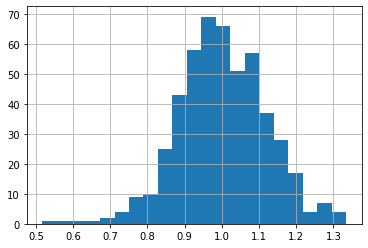

In [259]:
m20overc.FEV6PPh.hist(bins='auto')

In [260]:
m20overb.FEV1PPh.describe()

count    476.000000
mean       0.992176
std        0.156371
min       -0.211045
25%        0.915208
50%        0.999903
75%        1.085359
max        1.502538
Name: FEV1PPh, dtype: float64

There is one m20overb FEV1PPh of -.211 which should be removed
need find out which one this is and why

In [261]:
m20overc.FEV6PPh.describe()

count    495.000000
mean       1.002285
std        0.119977
min        0.516701
25%        0.927629
50%        0.996041
75%        1.084531
max        1.334825
Name: FEV6PPh, dtype: float64

There is one m20overc FEV6PP of 26.68 - an outlier which should be removed
need find out which one this is and why

In [262]:
m20overb.FEV6PPh.describe()

count    475.000000
mean       0.994663
std        0.149975
min       -0.333071
25%        0.917725
50%        1.001210
75%        1.087750
max        1.370130
Name: FEV6PPh, dtype: float64

In [263]:
m20overb[m20overb.MMEFPP > 20]

AttributeError: 'DataFrame' object has no attribute 'MMEFPP'

m20overb FEV6 - has one -.33, max 25.78

In [264]:
m20overma.FEV6PPh.describe()

count    591.000000
mean       1.001969
std        0.115119
min        0.550087
25%        0.929592
50%        1.001033
75%        1.086546
max        1.421370
Name: FEV6PPh, dtype: float64

In [265]:
m20overb.FVCPPh.describe()

count    476.000000
mean       0.994234
std        0.152799
min       -0.418322
25%        0.915074
50%        0.999618
75%        1.087108
max        1.379428
Name: FVCPPh, dtype: float64

FVC m20overb FVCPPh min -.418

should look at all the FVC values for m20overb and see if any are negative
or print the FVC and FVCPPh for all of those and see which is off (is a predicted negative)

FVC equation is good for m20overc;  FEV6 equation is bad (or has bad data)

To search for bad data need check min and max for all dataframes for all PP values; check for all absolute values that none are negative

In [266]:
mlt20ma.FVCPPh.describe()

count    604.000000
mean       0.995454
std        0.108472
min        0.559574
25%        0.916798
50%        0.994209
75%        1.071477
max        1.334031
Name: FVCPPh, dtype: float64

m20overma FEV6PPh max 26.5

In [267]:
m20overc.FEV1PP.hist(bins='auto')

AttributeError: 'DataFrame' object has no attribute 'FEV1PP'

FEV1PP on our data is not 1 - why is that

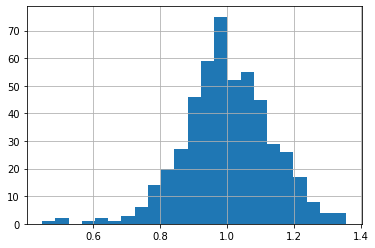

In [268]:
m20overc.FEV1PPh.hist(bins='auto')

In [269]:
def creatediffsppratio(df):
    df['FEV1OFVCPPdiff'] = df.FEV1OFVCPP - df.FEV1OFVCPPh
    df['FEV1OFEV6PPdiff'] = df.FEV1OFEV6PP - df.FEV1OFEV6PPh 
    

In [270]:
for y in hratioframestoanalyze:
#    print (y.name)
    creatediffsppratio(y)

AttributeError: 'DataFrame' object has no attribute 'FEV1OFVCPP'

In [ ]:
m20overc.FEV1OFVCPP.hist(bins='auto')

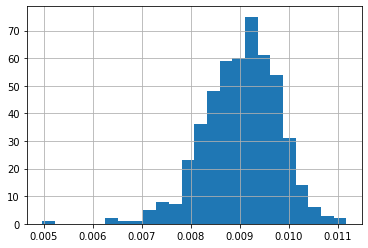

In [271]:
m20overc.FEV1OFVCPPh.hist(bins='auto')

In [272]:
m20overc.FEV1OFVCPPdiff.hist(bins='auto')

AttributeError: 'DataFrame' object has no attribute 'FEV1OFVCPPdiff'

In [273]:
plt.scatter(X, y)

NameError: name 'X' is not defined

In [ ]:
from scipy import stats

# now plot y actual value (e.g. of PEFR/FVC) vs predicted PEFR/FVC
first need new value PEFROFVCPRED = the regression for predicted
  and PEFROFVCPP - %predicted of PEF
then do linear regression of x = PEFROFVCPRED and y = PEFROFVCROFVC
do scatter plot of X,y to see if 
do histogram of PEFROFVC
do linear regression and scatter plot of PEFROFVCPP (y) versus age to see if the SDev varies by age
need see if normal distribution of 

Also have new variables PEFRPP/FVCPP - or PEFRPP-FVCPP
  then see if one or other has normal distribution and what is variance
  ratio should be centered around 1; and difference around 0
  I have been using PEFRPP-FVCPP >30 as indicator, but ratio may be better (e.g. if more than 1.3,

do plot of actual FEV1 vs predicted FEV1 ( x vs y)
to get lower limit, need standard deviation - first see if normal distribution
  then fit to gaussian and sdev from that
  
  need check whether same sdev for each age; whether same for each height, for each height**2, for each predicted FEV1
    by categories


We're trying to replicate and update Hankinson

We're trying to replicate and update Hankinson

# Now need determine LLN - ?used std

Determine lower limit of normal
  can do this if get starndard deviation for each variable
Assuming normal distribution get standard deviation for each variable
Could create variable as %predicted, then do normal distribution of the %predicteds
Would want to check if the standard deviation varied by age ?height
Alternatively is there a way to get lower 5%
